In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,770200,2,0,hopero,37,2,1,25.2,"October 4, 2022",As a hacker who's full-time job is web applica...
1,770200,0,0,killing_flies,204,3,1,78.5,"July 29, 2022",Great game for learning Assembly. It's actuall...
2,770200,0,0,76561199153159148,10,5,1,7.8,"July 19, 2022",Great game for learning how assembly works at ...
3,770200,0,0,76561199058983191,7,1,1,4.7,"July 17, 2022",Keep it up. Games like this are worth every pe...
4,770200,0,0,M1xl,47,1,1,17.9,"July 7, 2022",Sooo... Acctually a great game not even joking...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,2,0,1,25.2,"October 4, 2022",As a hacker who's full-time job is web applica...
1,0,0,1,78.5,"July 29, 2022",Great game for learning Assembly. It's actuall...
2,0,0,1,7.8,"July 19, 2022",Great game for learning how assembly works at ...
3,0,0,1,4.7,"July 17, 2022",Keep it up. Games like this are worth every pe...
4,0,0,1,17.9,"July 7, 2022",Sooo... Acctually a great game not even joking...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 4, 2022",As a hacker who's full-time job is web applica...,2,0,25.2,1
1,"July 29, 2022",Great game for learning Assembly. It's actuall...,0,0,78.5,1
2,"July 19, 2022",Great game for learning how assembly works at ...,0,0,7.8,1
3,"July 17, 2022",Keep it up. Games like this are worth every pe...,0,0,4.7,1
4,"July 7, 2022",Sooo... Acctually a great game not even joking...,0,0,17.9,1
5,"June 29, 2022",It's a good game,0,0,3.9,1
6,"June 16, 2022",good game but the mana system is underused rea...,0,0,29.0,1
7,"June 12, 2022","At first, I thought the game was boring to be ...",0,0,10.0,1
8,"June 7, 2022","There could be a bug in the game, I have repor...",0,0,4.8,-1
9,"May 30, 2022",Unique and fun,0,0,1.6,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  46 non-null     object 
 1   Review_Text     45 non-null     object 
 2   Num_Helpful     46 non-null     int64  
 3   Num_Funny       46 non-null     int64  
 4   Hours_Played    46 non-null     float64
 5   Recommend       46 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6092/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 4, 2022",As a hacker who's full-time job is web applica...,2,0,25.2,1,1664841600
1,"July 29, 2022",Great game for learning Assembly. It's actuall...,0,0,78.5,1,1659052800
2,"July 19, 2022",Great game for learning how assembly works at ...,0,0,7.8,1,1658188800
3,"July 17, 2022",Keep it up. Games like this are worth every pe...,0,0,4.7,1,1658016000
4,"July 7, 2022",Sooo... Acctually a great game not even joking...,0,0,17.9,1,1657152000


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6092/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 4, 2022",As a hacker who's full-time job is web applica...,2,0,25.2,1,1664841600,2752
1,"July 29, 2022",Great game for learning Assembly. It's actuall...,0,0,78.5,1,1659052800,2743
2,"July 19, 2022",Great game for learning how assembly works at ...,0,0,7.8,1,1658188800,2741
3,"July 17, 2022",Keep it up. Games like this are worth every pe...,0,0,4.7,1,1658016000,2741
4,"July 7, 2022",Sooo... Acctually a great game not even joking...,0,0,17.9,1,1657152000,2740


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 4, 2022",As a hacker who's full-time job is web applica...,2,0,25.2,1,1664841600,2752
1,"July 29, 2022",Great game for learning Assembly. It's actuall...,0,0,78.5,1,1659052800,2743
2,"July 19, 2022",Great game for learning how assembly works at ...,0,0,7.8,1,1658188800,2741
3,"July 17, 2022",Keep it up. Games like this are worth every pe...,0,0,4.7,1,1658016000,2741
4,"July 7, 2022",Sooo... Acctually a great game not even joking...,0,0,17.9,1,1657152000,2740


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2752,"October 4, 2022",As a hacker who's full-time job is web applica...
1,2743,"July 29, 2022",Great game for learning Assembly. It's actuall...
2,2741,"July 19, 2022",Great game for learning how assembly works at ...
3,2741,"July 17, 2022",Keep it up. Games like this are worth every pe...
4,2740,"July 7, 2022",Sooo... Acctually a great game not even joking...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2555,"December 21, 2018",6
1,2563,"February 16, 2019",1
2,2575,"May 13, 2019",1
3,2578,"June 1, 2019",1
4,2579,"June 12, 2019",1
5,2580,"June 15, 2019",1
6,2584,"July 11, 2019",1
7,2604,"December 1, 2019",1
8,2607,"December 21, 2019",2
9,2607,"December 22, 2019",1


<AxesSubplot:>

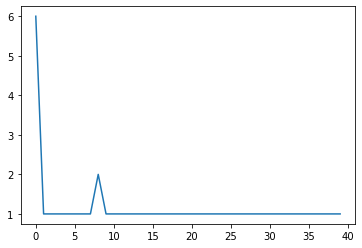

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

46

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.15

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2555,6
1,2563,1
2,2575,1
3,2578,1
4,2579,1
5,2580,1
6,2584,1
7,2604,1
8,2607,3
9,2608,1


<AxesSubplot:>

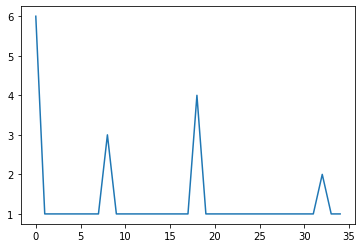

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

46

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

1.3142857142857143

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 4, 2022",As a hacker who's full-time job is web applica...,2,0,25.2,1,1664841600,2752
1,"July 29, 2022",Great game for learning Assembly. It's actuall...,0,0,78.5,1,1659052800,2743
2,"July 19, 2022",Great game for learning how assembly works at ...,0,0,7.8,1,1658188800,2741
3,"July 17, 2022",Keep it up. Games like this are worth every pe...,0,0,4.7,1,1658016000,2741
4,"July 7, 2022",Sooo... Acctually a great game not even joking...,0,0,17.9,1,1657152000,2740


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2555,108
1,2563,5
2,2575,2
3,2578,2
4,2579,9
5,2580,0
6,2584,13
7,2604,6
8,2607,11
9,2608,1


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2555,28,8,18.0,18.000000
2563,5,5,5.0,5.000000
2575,2,2,2.0,2.000000
2578,2,2,2.0,2.000000
2579,9,9,9.0,9.000000
2580,0,0,0.0,0.000000
2584,13,13,13.0,13.000000
2604,6,6,6.0,6.000000
2607,7,2,2.0,3.666667


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

208

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

4.521739130434782

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2555,21
1,2563,0
2,2575,0
3,2578,0
4,2579,2
5,2580,0
6,2584,3
7,2604,1
8,2607,2
9,2608,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2555,6,1,3.5,3.500000
2563,0,0,0.0,0.000000
2575,0,0,0.0,0.000000
2578,0,0,0.0,0.000000
2579,2,2,2.0,2.000000
2580,0,0,0.0,0.000000
2584,3,3,3.0,3.000000
2604,1,1,1.0,1.000000
2607,2,0,0.0,0.666667


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

31

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.6739130434782609

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2555,2.1
1,2563,5.6
2,2575,14.1
3,2578,1.5
4,2579,1.3
5,2580,0.5
6,2584,4.4
7,2604,4.2
8,2607,6.7
9,2608,1.5


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2555,0.6,0.1,0.35,0.350000
2563,5.6,5.6,5.60,5.600000
2575,14.1,14.1,14.10,14.100000
2578,1.5,1.5,1.50,1.500000
2579,1.3,1.3,1.30,1.300000
2580,0.5,0.5,0.50,0.500000
2584,4.4,4.4,4.40,4.400000
2604,4.2,4.2,4.20,4.200000
2607,4.1,1.3,1.30,2.233333


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

447.0000000000001

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

9.71739130434783

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2555,-1.000000
1,2563,1.000000
2,2575,1.000000
3,2578,1.000000
4,2579,-1.000000
5,2580,1.000000
6,2584,-1.000000
7,2604,-1.000000
8,2607,0.333333
9,2608,-1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2555,-1,-1,-1.0,-1.000000
2563,1,1,1.0,1.000000
2575,1,1,1.0,1.000000
2578,1,1,1.0,1.000000
2579,-1,-1,-1.0,-1.000000
2580,1,1,1.0,1.000000
2584,-1,-1,-1.0,-1.000000
2604,-1,-1,-1.0,-1.000000
2607,1,-1,1.0,0.333333


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

14

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.30434782608695654

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 4, 2022",As a hacker who's full-time job is web applica...,2,0,25.2,1,1664841600,2752
1,"July 29, 2022",Great game for learning Assembly. It's actuall...,0,0,78.5,1,1659052800,2743
2,"July 19, 2022",Great game for learning how assembly works at ...,0,0,7.8,1,1658188800,2741
3,"July 17, 2022",Keep it up. Games like this are worth every pe...,0,0,4.7,1,1658016000,2741
4,"July 7, 2022",Sooo... Acctually a great game not even joking...,0,0,17.9,1,1657152000,2740


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 4, 2022",As a hacker who's full-time job is web applica...,2,0,0.320153,1.0,1.000000,2752
1,"July 29, 2022",Great game for learning Assembly. It's actuall...,0,0,1.000000,1.0,0.951555,2743
2,"July 19, 2022",Great game for learning how assembly works at ...,0,0,0.098214,1.0,0.944324,2741
3,"July 17, 2022",Keep it up. Games like this are worth every pe...,0,0,0.058673,1.0,0.942878,2741
4,"July 7, 2022",Sooo... Acctually a great game not even joking...,0,0,0.227041,1.0,0.935647,2740
5,"June 29, 2022",It's a good game,0,0,0.048469,1.0,0.929863,2738
6,"June 16, 2022",good game but the mana system is underused rea...,0,0,0.368622,1.0,0.920463,2737
7,"June 12, 2022","At first, I thought the game was boring to be ...",0,0,0.126276,1.0,0.917570,2736
8,"June 7, 2022","There could be a bug in the game, I have repor...",0,0,0.059949,0.0,0.913955,2735
9,"May 30, 2022",Unique and fun,0,0,0.019133,1.0,0.908171,2734


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6092/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 4, 2022",As a hacker who's full-time job is web applica...,2,0,0.320153,1.0,1.000000,2752
1,"July 29, 2022",Great game for learning Assembly. It's actuall...,0,0,1.000000,1.0,0.951555,2743
2,"July 19, 2022",Great game for learning how assembly works at ...,0,0,0.098214,1.0,0.944324,2741
3,"July 17, 2022",Keep it up. Games like this are worth every pe...,0,0,0.058673,1.0,0.942878,2741
4,"July 7, 2022",Sooo... Acctually a great game not even joking...,0,0,0.227041,1.0,0.935647,2740
5,"June 29, 2022",It's a good game,0,0,0.048469,1.0,0.929863,2738
6,"June 16, 2022",good game but the mana system is underused rea...,0,0,0.368622,1.0,0.920463,2737
7,"June 12, 2022","At first, I thought the game was boring to be ...",0,0,0.126276,1.0,0.917570,2736
8,"June 7, 2022","There could be a bug in the game, I have repor...",0,0,0.059949,0.0,0.913955,2735
9,"May 30, 2022",Unique and fun,0,0,0.019133,1.0,0.908171,2734


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2555    [Teaches nothing currently. Nothing at all. I ...
2563    [Good for early access. Has a lot of potential...
2575    [Game have a lotttt of potential ... in about ...
2578    [It's still early access but it already looks ...
2579    [The game is extremely unstable, it crashes fo...
2580    [current price gets you demo purchase if you w...
2584    [Played a little bit, its fun, but definitely ...
2604    [The idea of the game and implementation are o...
2607    [Not a game yet, it's in very early access. It...
2608    [It would be a good game if it worked the thin...
2610    [I wish I was able to play the minigames separ...
2614    [It is pretty fun. Can be explained a lot bett...
2615    [I wouldn't recommend it as of now, the gamepl...
2621    [i recently bought this to check it out cause ...
2633    [The game is poorly made, gives the impression...
2634    [Even though this game is still in early acces...
2635    [Haven't finished the game yet but so far its ..

In [52]:
# storing data in JSON format
df_text_list.to_json('squally_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('squally_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2555  [Teaches nothing currently. Nothing at all. I ...
1   Review_Text   2563  [Good for early access. Has a lot of potential...
2   Review_Text   2575  [Game have a lotttt of potential ... in about ...
3   Review_Text   2578  [It's still early access but it already looks ...
4   Review_Text   2579  [The game is extremely unstable, it crashes fo...
5   Review_Text   2580  [current price gets you demo purchase if you w...
6   Review_Text   2584  [Played a little bit, its fun, but definitely ...
7   Review_Text   2604  [The idea of the game and implementation are o...
8   Review_Text   2607  [Not a game yet, it's in very early access. It...
9   Review_Text   2608  [It would be a good game if it worked the thin...
10  Review_Text   2610  [I wish I was able to play the minigames separ...
11  Review_Text   2614  [It is pretty fun. Can be explained a lot bett...
12  Review_Text   2615  [I wouldn't re

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('squally_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6092/2755724399.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('squally_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_6092/912977851.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('squally_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])